# Intro to *Tensorflow*, *Deep Neural Networks*

### Phase 4

## Objectives
- Get some <a href='#background'>background</a> in Tensorflow, Keras (and PyTorch).
- Look at <a href='#tensors'>Tensors</a> and how they're used.
- Start working in <a href='#tensorflow'>Tensorflow</a>!
    - <a href='#preprocessing'>Processing Data</a>.
    - Various methods of <a href='#tuning'>building and tuning a Model</a>.

# Tensorflow / Keras
<a id='background'></a>
## Background

- Keras is an API coded in Python.
- There are three systems built on the Keras API: *Tensorflow*, *Theano*, *CNTK*.
    - *Theano has been discontinued. The last release was 2017, but can still be used.*
- Keras development is backed primarily by Google, and the Keras API comes packaged in TensorFlow as `tf.keras`.
- **We will use TensorFlow**, as it is the most popular. TensorFlow became the most used Keras backend, and eventually integrated Keras into via the tf.keras submodule of TensorFlow.


> *PyTorch is the leading competitor to Tensorflow based on interest and usage.*
>
> *Many higher education institutions are teaching deep learning via PyTorch. Although not at all necessary to know both, I would recommend to keep PyTorch in your mind and perhaps add to your repertoire as a Data Scientist.*

<a id='tensors'></a>
# Tensors
<img src='./images/tensors.png' width=600>

> **Left:** A "Column"
>
> **Middle:** A "DataFrame"
>
> **Right:** A "multi-dimensional DataFrame". *Most commonly images.*

## Tensors as *Images*

- A Black and White image can be represented as a tensor of shape *$\large (m, n)$* where coordinate $\large (m_i, n_i)$ points to a *pixel*.
<img src='./images/bw_pixel.jpeg' width=300>

- A Color image (rgb) can be represented as a tensor of shape *$\large (m, n, 3)$* where a coordinate $\large (m_i, n_i, r)$ would point to a pixel in layer $\large r$ and $\large (m_i, n_i, b)$ would point to a pixel in layer $\large b$.
<img src='./images/rgb_example.png'>

## Tensors as *Game-States*

> - **AlphaZero**, Google's Reinforcement Learning Neural Network was trained to play games (Go, Chess, Shogi, Starcraft II, others). 
> - This is a two-part model:
    1. A Neural Network and 
    2. a Monte Carlo Tree Search algorithm.
    
    
- 3-dimensional tensors are used as an input and output for the neural network.


- Input is a tensor of shape *$\large (N, N, (MT + L))$*.
    - $N x N$ represents the shape of the board.
        - (8, 8) for chess: *[1-8, a-h]*.
    - $T$ represents a *time-step* for the game.
        - The previous 8-game positions are stored and fed as an input.
    - $M$ represents a binary representation of the presence of the player's pieces on the board, one for each piece-type.
        - 6 piece-types for chess: Pawn, Knight, Bishop, Rook, Queen, King
    - $L$ represents a number of constant-vaues input plantes, denoting aspects of the game-state.
        - Player's color, total move count, special rules (castling, repetition count for that specific position, number of moves "without progress").

<img src='./images/alphazero_input.png' width=500>

#### Fun Facts:
> *Match Results: Google's Deep Mind project **AlphaZero** vs reigning WCCC Champion **Stockfish**.*
>
> | Game | White | Black | Win | Draw | Loss |
> | ---- | ----- | ----- | --- | ---- | ---- |
> | Chess | AlphaZero | Stockfish | 25 | 25 | 0
> | Chess | Stockfish | AlphaZero | 3 | 47 | 0
>
> - *Stockfish "calculates" 60, 000, 000 positions per second. AlphaZero "calculates" 60, 000 positions per second.*
> - *AlphaZero was trained on 9-hours of training ("self-play").*
>
> Additional Resources and Information:
> <a href='https://arxiv.org/abs/1712.01815'>*Mastering Chess and Shogi [...]*</a>

<a id='tensorflow'></a>
# Working with Tensorflow

**In this example, we want to be using *DataFrame-shaped* Tensors** $(m, n)$.
*In order to do this, we will want **each row to represent an entire image** and each column to represent a pixel.*

*We will talk about CNNs next - where each row is an entire image, but is **not** flattened first.* 
- E.g.: An input could be represented in shape $(1000, 64, 64, 3)$.*
```
DataShape = (
    {number of images = 1000}, 
    {number of rows (pixels) = 64}, 
    {number of columns (pixels) = 64}, 
    {number of planes (rgb) = 3}
)
```

## Loading Data

In [1]:
import keras
import tensorflow as tf
from tensorflow.keras import layers, Sequential

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
X = digits.images
y = digits.target

In [4]:
X.shape

(1797, 8, 8)

In [5]:
y.shape

(1797,)

In [6]:
X[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

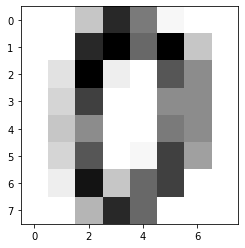

In [7]:
plt.imshow(X[0], cmap='Greys');

In [8]:
# Also, we could access "flat" images directly from this dataset, as seen before.
digits['data'][0].shape

(64,)

In [9]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<a id='preprocessing'></a>
## Preprocessing
*Not strictly necessary with this toy dataset since the images can be accessed as "flat" already, however we can get a sense of what the preprocessing will be like in Tensorflow.*

- Flatten each image into a row of data.
    - Alternatively, with this example, we could just use `data`.
- Train-test-split into Train, Test, Validation
    - Sizes: (0.7, 0.15, 0.15)
- Scale data to a value [0-1] (pixel intensity)


- One Hot Encode our target.

### Flattening Images

In [10]:
X[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
y[0]

0

In [12]:
# Already a numpy array.
X[0].reshape(-1,)

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
X.shape[0]

1797

In [14]:
X_flat = X.reshape(X.shape[0], -1)
X_flat.shape

(1797, 64)

In [15]:
X_flat[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [16]:
# # Alternate method without using the broadcasting `.reshape`.
# X_flat = np.array([x.reshape(-1,) for x in X])

In [17]:
# Sanity Check
all(digits['data'][0] == X_flat[0])

True

### Target Processing: OneHotEncoder

- Differently from scikit-learn models, Tensorflow multiclass classification models' predictions are an array (a OneHotEncoded version of a multiclass variable).
- Since we are encoding only our target (and we want this representation consistent) we can perform this before the train-test-split.

In [18]:
y[:15]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4])

In [19]:
ohe = OneHotEncoder(sparse=False)
y_ohe = ohe.fit_transform(y.reshape(-1, 1))

In [20]:
y_ohe.shape

(1797, 10)

In [21]:
ohe.categories_

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])]

In [22]:
y_ohe[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

### Train Test Split
*My go-to train/test/val size is (0.7, 0.15, 0.15), but there is no hard and fast rule on this.*

In [23]:
SEED = 51
TEST_SIZE = int(X_flat.shape[0] * 0.15)

# Number of samples for Test and Val
TEST_SIZE

269

In [24]:
# Split out Test data first.
X_train, X_test, y_train, y_test = train_test_split(
    X_flat, y_ohe, test_size=TEST_SIZE, random_state=SEED)

# Split Val from training data.
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=TEST_SIZE, random_state=SEED)

# Sanity check.
print(f'Train:\n\tX: {X_train.shape}\n\ty: {y_train.shape}')
print(f'Test:\n\tX: {X_test.shape}\n\ty: {y_test.shape}')
print(f'Val:\n\tX: {X_val.shape}\n\ty: {y_val.shape}')

Train:
	X: (1259, 64)
	y: (1259, 10)
Test:
	X: (269, 64)
	y: (269, 10)
Val:
	X: (269, 64)
	y: (269, 10)


### Scaling Data

In [25]:
# Check the max values in each image array.
(max([x for img in X_train for x in img]),
 max([x for img in X_test for x in img]),
 max([x for img in X_val for x in img]))

(16.0, 16.0, 16.0)

*Since pixel data exists with constraints (255 is the maximum value for most images, 16 is the maximum value here), there is no worry of data leakage between data sets.*

In [26]:
# Scaling data.
X_train, X_test, X_val = X_train / 16, X_test / 16, X_val / 16

In [27]:
# Sanity check.
(max([x for img in X_train for x in img]),
 max([x for img in X_test for x in img]),
 max([x for img in X_val for x in img]))

(1.0, 1.0, 1.0)

In [28]:
X_train[0]

array([0.    , 0.    , 0.625 , 0.8125, 0.3125, 0.    , 0.    , 0.    ,
       0.    , 0.1875, 1.    , 1.    , 1.    , 0.625 , 0.    , 0.    ,
       0.    , 0.5   , 1.    , 0.0625, 0.375 , 1.    , 0.3125, 0.    ,
       0.    , 0.5   , 0.6875, 0.    , 0.    , 0.5625, 0.75  , 0.    ,
       0.    , 0.625 , 0.5   , 0.    , 0.    , 0.5   , 0.75  , 0.    ,
       0.    , 0.5   , 0.6875, 0.    , 0.    , 0.5   , 0.6875, 0.    ,
       0.    , 0.1875, 1.    , 0.625 , 0.5   , 0.9375, 0.5625, 0.    ,
       0.    , 0.    , 0.5625, 1.    , 1.    , 0.625 , 0.0625, 0.    ])

## Building a Model

- FFNN (Forward-Feed Neural Networks) are named for the way they proceed sequentially through their layers.
- For today, we will only look at this model type.
- In Tensorflow they are part of a class `Sequential`.

In [29]:
# Starting model construction.
model = Sequential()
model

In [30]:
X_train.shape[1]

64

In [31]:
# Adding an input layer.
model.add(
    layers.Dense(units=4, activation='relu', input_dim=X_train.shape[1])
    )

In [32]:
# Adding an output layer.
model.add(
    layers.Dense(units=10, activation='softmax')
    )

- Lastly, we have to define a loss function, a metric, and an optimizer.

- Optimizers are functions which update our weights in smart ways instead of treating all parameters equaly. Adam, a popular optimizer, calculates an individual learning rate for each parameter.

In [33]:
# Compile model with an optimizer, loss function, and preferred metrics.
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
    )

In [34]:
# Show model summary.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 260       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                50        
Total params: 310
Trainable params: 310
Non-trainable params: 0
_________________________________________________________________


## Fitting / Predicting

In [35]:
# Fit
model.fit(X_train, y_train)

40/40 [==============================] - 0s 666us/step - loss: 2.5038 - accuracy: 0.0987


In [36]:
# Predict
model.predict(X_test[[0]])

array([[0.06004881, 0.09675416, 0.06445453, 0.08373644, 0.13072908,
        0.10956961, 0.11953972, 0.0686295 , 0.10795991, 0.15857817]],
      dtype=float32)

In [37]:
# Predict class
np.argmax(model.predict(X_test[[0]]), axis=-1)

array([9])

In [38]:
predictions_df = pd.DataFrame(
    zip(ohe.categories_[0], model.predict(X_test[[0]])[0]),
    columns=['Target', 'Softmax']
    )
predictions_df

,Target,Softmax
0,0,0.060049
1,1,0.096754
2,2,0.064455
3,3,0.083736
4,4,0.130729
5,5,0.109570
6,6,0.119540
7,7,0.068629
8,8,0.107960
9,9,0.158578


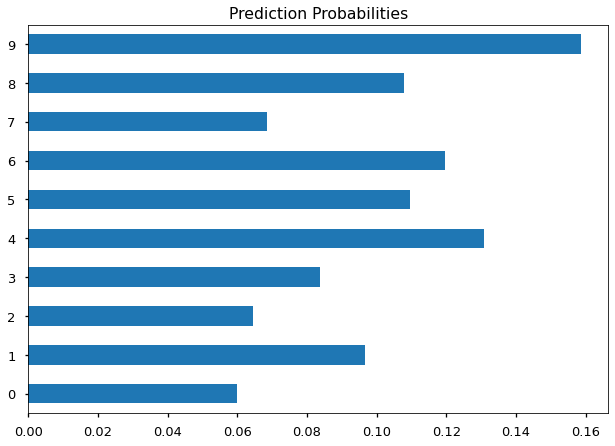

In [39]:
with plt.style.context('seaborn-talk'):
    fig, ax = plt.subplots()
    predictions_df['Softmax'].plot(kind='barh')
    ax.set(title='Prediction Probabilities')

In [40]:
# Functionalizing the above.
def plot_prediction_probabilities(trained_model, encoder, entry):
    """
    Show a bar chart representing prediction probabilities.
    """
    
    predictions_df = pd.DataFrame(
        zip(encoder.categories_[0], trained_model.predict(entry)[0]),
        columns=['Target', 'Softmax']
        )
    with plt.style.context('seaborn-talk'):
        fig, ax = plt.subplots()
        predictions_df['Softmax'].plot(kind='barh')
        ax.set(title='Prediction Probabilities')
        plt.show()

## Incorporating Validation Data

In [41]:
# Add validation data.
model.fit(X_train, y_train, validation_data=(X_val, y_val))

40/40 [==============================] - 1s 14ms/step - loss: 2.2652 - accuracy: 0.1652 - val_loss: 2.1974 - val_accuracy: 0.1822


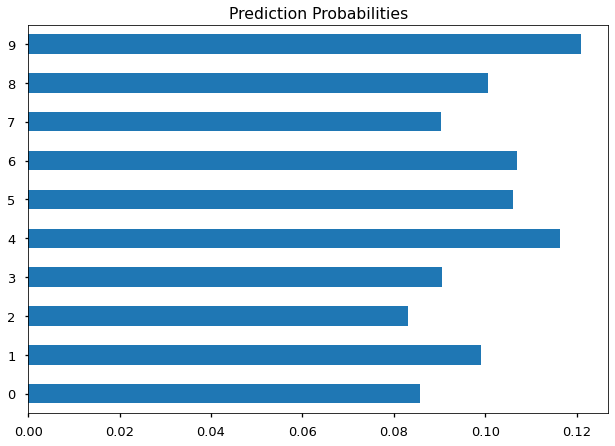

In [42]:
plot_prediction_probabilities(model, ohe, X_test[[0]])

## Add Epochs

In [43]:
# Save the model fit to a variable. Training info is stored here.
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)

Epoch 1/5
40/40 [==============================] - 0s 2ms/step - loss: 2.1773 - accuracy: 0.1811 - val_loss: 2.1388 - val_accuracy: 0.1747
Epoch 2/5
40/40 [==============================] - 0s 2ms/step - loss: 2.1214 - accuracy: 0.1867 - val_loss: 2.0899 - val_accuracy: 0.1933
Epoch 3/5
40/40 [==============================] - 0s 4ms/step - loss: 2.0710 - accuracy: 0.2121 - val_loss: 2.0415 - val_accuracy: 0.2045
Epoch 4/5
40/40 [==============================] - 0s 2ms/step - loss: 2.0173 - accuracy: 0.2295 - val_loss: 1.9745 - val_accuracy: 0.2565
Epoch 5/5
40/40 [==============================] - 0s 1ms/step - loss: 1.9531 - accuracy: 0.2589 - val_loss: 1.9128 - val_accuracy: 0.3160


In [44]:
history

In [45]:
history.history

{'loss': [2.1773080825805664,
  2.1214189529418945,
  2.0709683895111084,
  2.017324686050415,
  1.9531195163726807],
 'accuracy': [0.18109610676765442,
  0.18665607273578644,
  0.21207307279109955,
  0.22954726219177246,
  0.2589356601238251],
 'val_loss': [2.1387760639190674,
  2.08988094329834,
  2.0415289402008057,
  1.9744623899459839,
  1.912843108177185],
 'val_accuracy': [0.17472119629383087,
  0.19330854713916779,
  0.2044609636068344,
  0.2565055787563324,
  0.31598514318466187]}

In [46]:
def plot_history(history, style=['ggplot', 'seaborn-talk']):
    """
    Plot history from History object (or history dict) 
    once Tensorflow model is trained.
    
    Parameters:
    -----------
    history:
        History object returned from a model.fit()
    style: string or list of strings (default: ['ggplot', 'seaborn-talk'])
        Style from matplotlib.
    """
    
    # We can pass in a model history object or a dictionary.
    if not isinstance(history, dict): # We prefer this type of check over `if type() == ...`
        history = history.history

    metrics_lst = [m for m in history.keys() if not m.startswith('val')]
    N = len(metrics_lst)
    with plt.style.context(style):
        fig, ax_lst = plt.subplots(nrows=N, figsize=(8, 4*(N)))
        ax_lst = [ax_lst] if N == 1 else ax_lst.flatten() # Flatten ax_lst.
        for metric, ax in zip(metrics_lst, ax_lst):
            val_m = f'val_{metric}'
            ax.plot(history[metric], label=metric)
            ax.plot(history[val_m], label=val_m)
            ax.set(title=metric.title(), xlabel='Epoch', ylabel=metric.title())
            ax.legend()
        fig.tight_layout()
        plt.show()

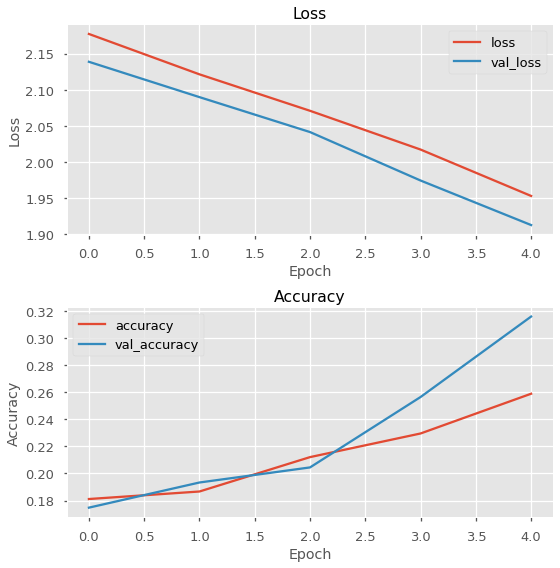

In [47]:
plot_history(history)

In [48]:
# Adding more epochs!
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
40/40 [==============================] - 0s 2ms/step - loss: 1.8910 - accuracy: 0.3145 - val_loss: 1.8484 - val_accuracy: 0.3532
Epoch 2/10
40/40 [==============================] - 0s 1ms/step - loss: 1.8289 - accuracy: 0.3725 - val_loss: 1.7867 - val_accuracy: 0.4312
Epoch 3/10
40/40 [==============================] - 0s 2ms/step - loss: 1.7694 - accuracy: 0.4234 - val_loss: 1.7253 - val_accuracy: 0.4833
Epoch 4/10
40/40 [==============================] - 0s 2ms/step - loss: 1.7099 - accuracy: 0.4607 - val_loss: 1.6665 - val_accuracy: 0.5242
Epoch 5/10
40/40 [==============================] - 0s 2ms/step - loss: 1.6517 - accuracy: 0.4948 - val_loss: 1.6107 - val_accuracy: 0.5539
Epoch 6/10
40/40 [==============================] - 0s 2ms/step - loss: 1.5944 - accuracy: 0.5290 - val_loss: 1.5548 - val_accuracy: 0.5874
Epoch 7/10
40/40 [==============================] - 0s 2ms/step - loss: 1.5395 - accuracy: 0.5385 - val_loss: 1.5005 - val_accuracy: 0.5948
Epoch 8/10
40/40 [==

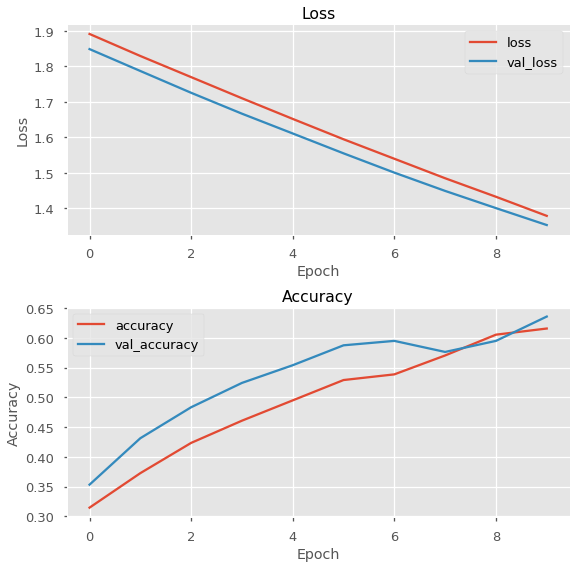

In [49]:
plot_history(history)

## Add Layers
There are no hard set rules for building neural networks. It is an empirical process, where one tries different architectures and see what works. However, it is a good idea to try out deep networks, since we know that successive layers find increasingly complex patterns.

In [50]:
# Building a new model with a hidden layer.
model = Sequential()
model.add(layers.Dense(units=4, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(units=6, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

model.compile(
    optimizer="adam", 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                70        
Total params: 360
Trainable params: 360
Non-trainable params: 0
_________________________________________________________________


In [51]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
40/40 [==============================] - 0s 4ms/step - loss: 2.3045 - accuracy: 0.0226 - val_loss: 2.2754 - val_accuracy: 0.1301
Epoch 2/20
40/40 [==============================] - 0s 1ms/step - loss: 2.2640 - accuracy: 0.1288 - val_loss: 2.2254 - val_accuracy: 0.1338
Epoch 3/20
40/40 [==============================] - 0s 1ms/step - loss: 2.2137 - accuracy: 0.1591 - val_loss: 2.1510 - val_accuracy: 0.1524
Epoch 4/20
40/40 [==============================] - 0s 1ms/step - loss: 2.1257 - accuracy: 0.1877 - val_loss: 2.0634 - val_accuracy: 0.1784
Epoch 5/20
40/40 [==============================] - 0s 1ms/step - loss: 2.0259 - accuracy: 0.1966 - val_loss: 1.9688 - val_accuracy: 0.2007
Epoch 6/20
40/40 [==============================] - 0s 1ms/step - loss: 1.9457 - accuracy: 0.2156 - val_loss: 1.8714 - val_accuracy: 0.2230
Epoch 7/20
40/40 [==============================] - 0s 2ms/step - loss: 1.8767 - accuracy: 0.2434 - val_loss: 1.7786 - val_accuracy: 0.2937
Epoch 8/20
40/40 [==

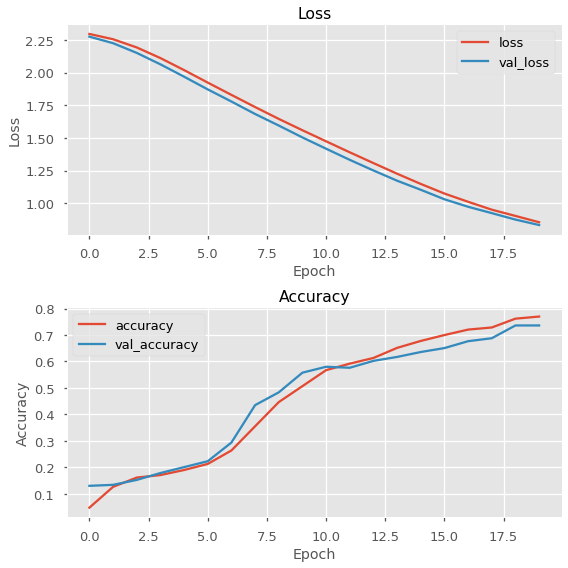

In [52]:
plot_history(history)

In [53]:
# Adding one more layer.
model = Sequential()
model.add(layers.Dense(units=4, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(units=6, activation='relu'))
model.add(layers.Dense(units=10, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))
model.compile(
    optimizer="adam", 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 260       
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
Total params: 470
Trainable params: 470
Non-trainable params: 0
_________________________________________________________________


In [54]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
40/40 [==============================] - 0s 4ms/step - loss: 2.3065 - accuracy: 0.0802 - val_loss: 2.2791 - val_accuracy: 0.1190
Epoch 2/20
40/40 [==============================] - 0s 1ms/step - loss: 2.2746 - accuracy: 0.0823 - val_loss: 2.2207 - val_accuracy: 0.1673
Epoch 3/20
40/40 [==============================] - 0s 1ms/step - loss: 2.2120 - accuracy: 0.1647 - val_loss: 2.1332 - val_accuracy: 0.2305
Epoch 4/20
40/40 [==============================] - 0s 1ms/step - loss: 2.1273 - accuracy: 0.2453 - val_loss: 2.0214 - val_accuracy: 0.3160
Epoch 5/20
40/40 [==============================] - 0s 2ms/step - loss: 1.9798 - accuracy: 0.3396 - val_loss: 1.8925 - val_accuracy: 0.3717
Epoch 6/20
40/40 [==============================] - 0s 1ms/step - loss: 1.8783 - accuracy: 0.3843 - val_loss: 1.7674 - val_accuracy: 0.4164
Epoch 7/20
40/40 [==============================] - 0s 1ms/step - loss: 1.7283 - accuracy: 0.4278 - val_loss: 1.6416 - val_accuracy: 0.4349
Epoch 8/20
40/40 [==

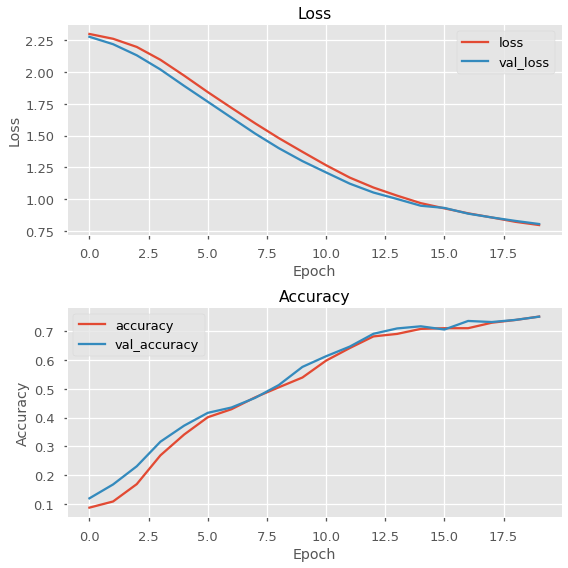

In [55]:
plot_history(history)

## Change Batch Size
By default, we use *mini-batch gradient descent*. We can change this by altering the `batch_size` parameter.

### Mini-Batch

In [56]:
model = Sequential()
model.add(layers.Dense(units=4, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(units=6, activation='relu'))
model.add(layers.Dense(units=10, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))
model.compile(
    optimizer="adam", 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [57]:
X_train.shape[0]

1259

In [58]:
# Full-batch.
history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val), 
    epochs=30,
#     batch_size=X_train.shape[0] # Full-Batch
    batch_size=32 # Mini-Batch
    )

Epoch 1/30
40/40 [==============================] - 0s 4ms/step - loss: 2.3163 - accuracy: 0.0968 - val_loss: 2.2992 - val_accuracy: 0.0595
Epoch 2/30
40/40 [==============================] - 0s 1ms/step - loss: 2.2898 - accuracy: 0.1216 - val_loss: 2.2834 - val_accuracy: 0.1599
Epoch 3/30
40/40 [==============================] - 0s 1ms/step - loss: 2.2624 - accuracy: 0.1683 - val_loss: 2.2370 - val_accuracy: 0.1413
Epoch 4/30
40/40 [==============================] - 0s 1ms/step - loss: 2.1900 - accuracy: 0.1897 - val_loss: 2.1565 - val_accuracy: 0.1673
Epoch 5/30
40/40 [==============================] - 0s 1ms/step - loss: 2.0888 - accuracy: 0.1878 - val_loss: 2.0423 - val_accuracy: 0.1784
Epoch 6/30
40/40 [==============================] - 0s 1ms/step - loss: 1.9786 - accuracy: 0.2051 - val_loss: 1.9299 - val_accuracy: 0.1933
Epoch 7/30
40/40 [==============================] - 0s 1ms/step - loss: 1.8551 - accuracy: 0.2275 - val_loss: 1.8211 - val_accuracy: 0.2416
Epoch 8/30
40/40 [==

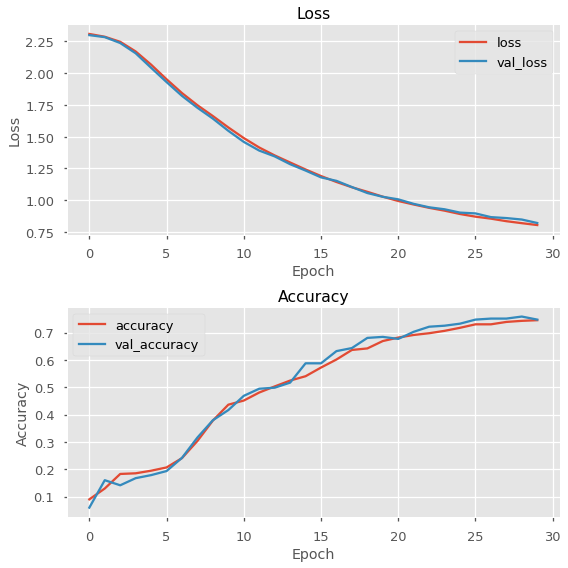

In [59]:
plot_history(history)

### Stochastic Gradient Descent

In [60]:
model = Sequential()
model.add(layers.Dense(units=4, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(units=6, activation='relu'))
model.add(layers.Dense(units=10, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

model.compile(
    optimizer="RMSProp", 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [61]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val), 
    epochs=10,
    batch_size=1
    )

Epoch 1/10
1259/1259 [==============================] - 1s 619us/step - loss: 2.2491 - accuracy: 0.1198 - val_loss: 1.8269 - val_accuracy: 0.3086
Epoch 2/10
1259/1259 [==============================] - 1s 536us/step - loss: 1.7766 - accuracy: 0.3429 - val_loss: 1.3782 - val_accuracy: 0.5428
Epoch 3/10
1259/1259 [==============================] - 1s 551us/step - loss: 1.3685 - accuracy: 0.5379 - val_loss: 0.9918 - val_accuracy: 0.6654
Epoch 4/10
1259/1259 [==============================] - 1s 695us/step - loss: 0.9918 - accuracy: 0.6377 - val_loss: 0.8521 - val_accuracy: 0.6989
Epoch 5/10
1259/1259 [==============================] - 1s 579us/step - loss: 0.8941 - accuracy: 0.6811 - val_loss: 0.7614 - val_accuracy: 0.6952
Epoch 6/10
1259/1259 [==============================] - 1s 591us/step - loss: 0.8329 - accuracy: 0.7056 - val_loss: 0.7203 - val_accuracy: 0.7249
Epoch 7/10
1259/1259 [==============================] - 1s 627us/step - loss: 0.7587 - accuracy: 0.7537 - val_loss: 0.6588 -

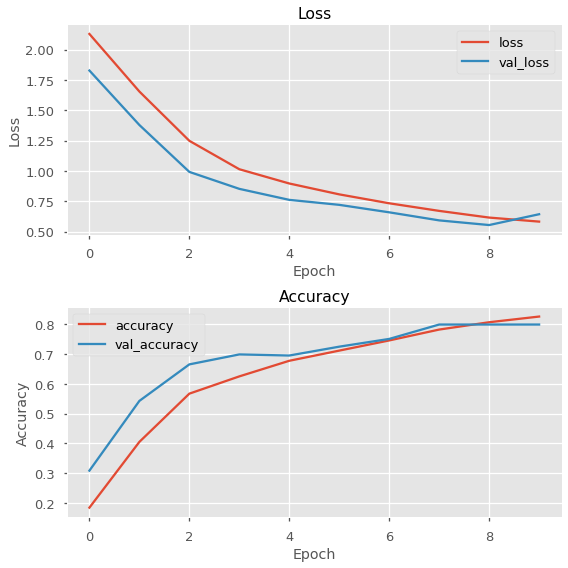

In [62]:
plot_history(history)

<a id='tuning'></a>
# Baseline Model - Before Tuning

In [63]:
model = Sequential()
model.add(layers.Dense(units=64, activation='relu', 
                       input_dim=X_train.shape[1]))

model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=8, activation='relu'))

model.add(layers.Dense(units=10, activation='softmax'))

model.compile(
    optimizer="adam", 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                90        
Total params: 6,994
Trainable params: 6,994
Non-trainable params: 0
_________________________________________________________________


In [64]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val), 
    epochs=50,
    batch_size=32
    )

Epoch 1/50
40/40 [==============================] - 0s 4ms/step - loss: 2.2495 - accuracy: 0.1383 - val_loss: 2.0681 - val_accuracy: 0.2045
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 2.0438 - accuracy: 0.1752 - val_loss: 1.8218 - val_accuracy: 0.2156
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 1.8223 - accuracy: 0.2043 - val_loss: 1.6477 - val_accuracy: 0.2528
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 1.6211 - accuracy: 0.3255 - val_loss: 1.3331 - val_accuracy: 0.4907
Epoch 5/50
40/40 [==============================] - 0s 1ms/step - loss: 1.2902 - accuracy: 0.5362 - val_loss: 0.9218 - val_accuracy: 0.7472
Epoch 6/50
40/40 [==============================] - 0s 1ms/step - loss: 0.9243 - accuracy: 0.7829 - val_loss: 0.5969 - val_accuracy: 0.8625
Epoch 7/50
40/40 [==============================] - 0s 1ms/step - loss: 0.6107 - accuracy: 0.8490 - val_loss: 0.4499 - val_accuracy: 0.8922
Epoch 8/50
40/40 [==

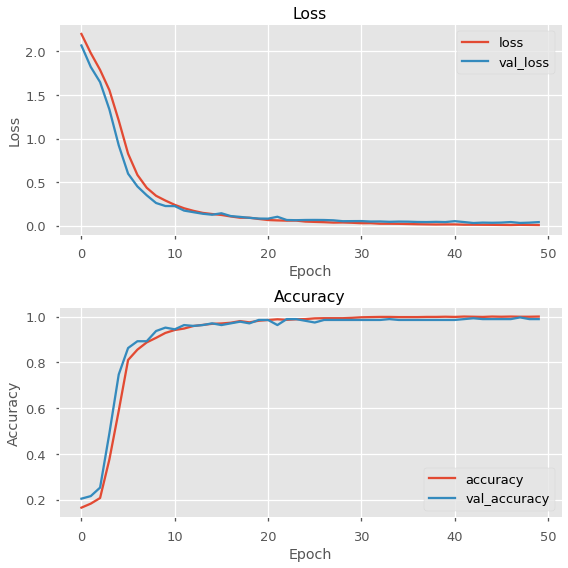

In [65]:
plot_history(history)

# Regularization

In [66]:
from tensorflow.keras import regularizers

In [67]:
# Adding a regularizer to the first hidden layer.
model = Sequential()
model.add(layers.Dense(units=64, activation='relu', 
                       input_dim=X_train.shape[1]))

model.add(layers.Dense(units=32, activation='relu', 
                       kernel_regularizer=regularizers.l2())) # L2 Regularizer
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=8, activation='relu'))

model.add(layers.Dense(units=10, activation='softmax'))
model.compile(
    optimizer="adam", 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                90        
Total params: 6,994
Trainable params: 6,994
Non-trainable params: 0
_________________________________________________________________


In [68]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val), 
    epochs=50,
    batch_size=32
    )

Epoch 1/50
40/40 [==============================] - 1s 4ms/step - loss: 2.6651 - accuracy: 0.1262 - val_loss: 2.4357 - val_accuracy: 0.2602
Epoch 2/50
40/40 [==============================] - 0s 1ms/step - loss: 2.3269 - accuracy: 0.3278 - val_loss: 2.0233 - val_accuracy: 0.2862
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 1.9036 - accuracy: 0.3644 - val_loss: 1.6490 - val_accuracy: 0.3717
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 1.5524 - accuracy: 0.5241 - val_loss: 1.3289 - val_accuracy: 0.6506
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 1.2540 - accuracy: 0.6701 - val_loss: 1.0243 - val_accuracy: 0.7323
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.9493 - accuracy: 0.7891 - val_loss: 0.8181 - val_accuracy: 0.7770
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.8011 - accuracy: 0.8267 - val_loss: 0.7277 - val_accuracy: 0.8216
Epoch 8/50
40/40 [==

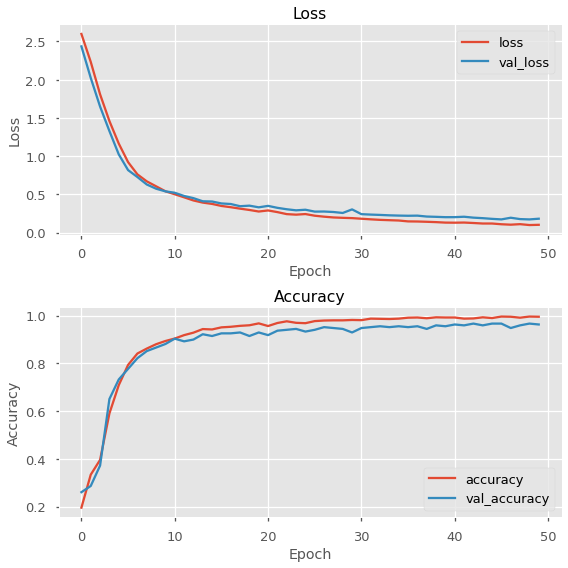

In [69]:
plot_history(history)

In [70]:
# Adding a regularizer to the each layer.
model = Sequential()
model.add(layers.Dense(units=64, activation='relu', 
                       input_dim=X_train.shape[1]))
model.add(layers.Dense(units=32, activation='relu', 
                       kernel_regularizer=regularizers.l2()))
model.add(layers.Dense(units=16, activation='relu',
                       kernel_regularizer=regularizers.l2()))
model.add(layers.Dense(units=8, activation='relu',
                       kernel_regularizer=regularizers.l2()))
model.add(layers.Dense(units=10, activation='softmax'))
model.compile(
    optimizer="adam", 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val), 
    epochs=50,
    batch_size=32
    )

Epoch 1/50
40/40 [==============================] - 1s 4ms/step - loss: 2.9480 - accuracy: 0.1822 - val_loss: 2.6067 - val_accuracy: 0.2937
Epoch 2/50
40/40 [==============================] - 0s 1ms/step - loss: 2.5014 - accuracy: 0.3035 - val_loss: 2.1144 - val_accuracy: 0.3569
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 2.0293 - accuracy: 0.4610 - val_loss: 1.6969 - val_accuracy: 0.6468
Epoch 4/50
40/40 [==============================] - 0s 1ms/step - loss: 1.6772 - accuracy: 0.6027 - val_loss: 1.4103 - val_accuracy: 0.7323
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 1.4049 - accuracy: 0.7283 - val_loss: 1.2058 - val_accuracy: 0.8067
Epoch 6/50
40/40 [==============================] - 0s 1ms/step - loss: 1.1737 - accuracy: 0.7983 - val_loss: 1.0599 - val_accuracy: 0.8439
Epoch 7/50
40/40 [==============================] - 0s 1ms/step - loss: 1.0612 - accuracy: 0.8216 - val_loss: 0.9499 - val_accuracy: 0.8810
Epoch 8/50
40/40 [==

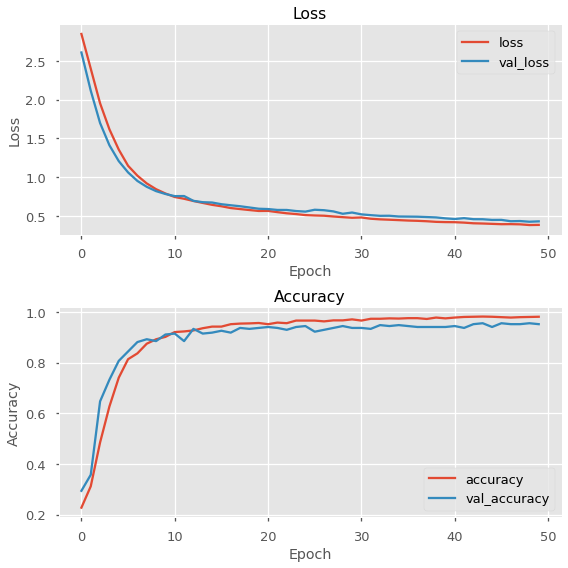

In [71]:
plot_history(history)

# Dropout
<img src='./images/drop_out.png'>

- *Adding dropout will randomly deactivate nodes during training in an attempt to strengthen and clarify the remaining active nodes.*

In [72]:
# Adding dropouts to each layer.
model = Sequential()
model.add(layers.Dense(units=64, activation='relu', 
                       input_dim=X_train.shape[1]))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(units=8, activation='relu'))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(units=10, activation='softmax'))
model.compile(
    optimizer="adam", 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val), 
    epochs=50,
    batch_size=32
    )

Epoch 1/50
40/40 [==============================] - 1s 5ms/step - loss: 2.3029 - accuracy: 0.1220 - val_loss: 2.2431 - val_accuracy: 0.2454
Epoch 2/50
40/40 [==============================] - 0s 4ms/step - loss: 2.2457 - accuracy: 0.1389 - val_loss: 2.1668 - val_accuracy: 0.2305
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 2.1669 - accuracy: 0.1564 - val_loss: 2.0542 - val_accuracy: 0.3271
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 2.0895 - accuracy: 0.1956 - val_loss: 1.8989 - val_accuracy: 0.3271
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 2.0078 - accuracy: 0.2468 - val_loss: 1.7717 - val_accuracy: 0.3643
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 1.8873 - accuracy: 0.2650 - val_loss: 1.6421 - val_accuracy: 0.4684
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 1.8037 - accuracy: 0.3105 - val_loss: 1.5114 - val_accuracy: 0.5242
Epoch 8/50
40/40 [==

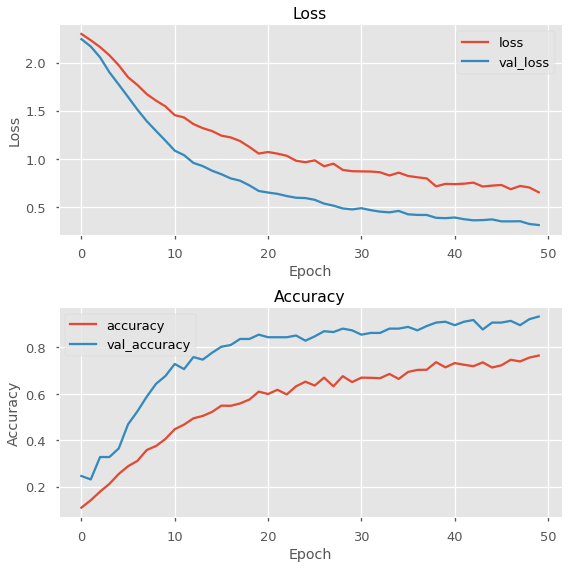

In [73]:
plot_history(history)

In [74]:
# Adding fewer dropouts to each layer.
model = Sequential()
model.add(layers.Dense(units=64, activation='relu', 
                       input_dim=X_train.shape[1]))
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(units=8, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(units=10, activation='softmax'))
model.compile(
    optimizer="adam", 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val), 
    epochs=50,
    batch_size=32
    )

Epoch 1/50
40/40 [==============================] - 1s 5ms/step - loss: 2.2551 - accuracy: 0.1101 - val_loss: 2.0908 - val_accuracy: 0.2193
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 2.0673 - accuracy: 0.1830 - val_loss: 1.7603 - val_accuracy: 0.3717
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 1.7613 - accuracy: 0.3424 - val_loss: 1.3598 - val_accuracy: 0.6059
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 1.5154 - accuracy: 0.4462 - val_loss: 1.1312 - val_accuracy: 0.6134
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 1.3614 - accuracy: 0.4804 - val_loss: 0.9796 - val_accuracy: 0.6766
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 1.2815 - accuracy: 0.5117 - val_loss: 0.8598 - val_accuracy: 0.7509
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 1.1262 - accuracy: 0.5658 - val_loss: 0.7021 - val_accuracy: 0.8067
Epoch 8/50
40/40 [==

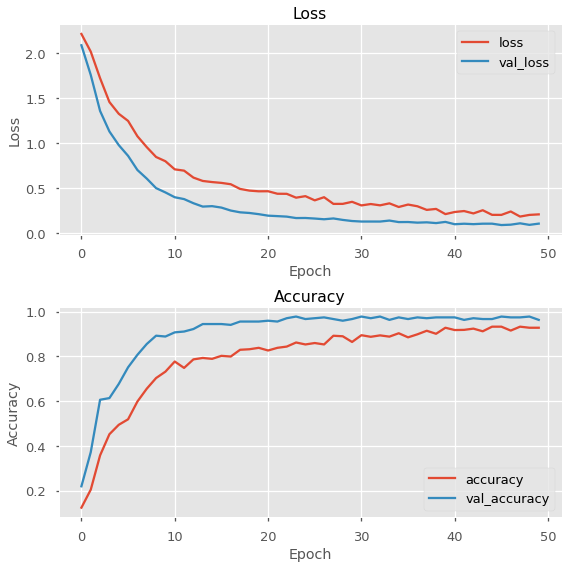

In [75]:
plot_history(history)

# Early Stopping
- *We can have the model stop training before the given number of epochs if it stops improving.*

In [76]:
from tensorflow.keras.callbacks import EarlyStopping

In [77]:
# Adding EarlyStopping.
model = Sequential()
model.add(layers.Dense(units=64, activation='relu', 
                       input_dim=X_train.shape[1]))

model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=8, activation='relu'))

model.add(layers.Dense(units=10, activation='softmax'))
model.compile(
    optimizer="adam", 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val), 
    epochs=200,
    batch_size=32,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True, verbose=1)]
    )

Epoch 1/200
40/40 [==============================] - 1s 5ms/step - loss: 2.2610 - accuracy: 0.1307 - val_loss: 2.1087 - val_accuracy: 0.1413
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 2.0339 - accuracy: 0.1685 - val_loss: 1.8331 - val_accuracy: 0.2639
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 1.7463 - accuracy: 0.3113 - val_loss: 1.5905 - val_accuracy: 0.3941
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 1.5477 - accuracy: 0.4168 - val_loss: 1.3797 - val_accuracy: 0.4349
Epoch 5/200
40/40 [==============================] - 0s 1ms/step - loss: 1.2894 - accuracy: 0.4969 - val_loss: 1.1439 - val_accuracy: 0.5465
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 1.0962 - accuracy: 0.5891 - val_loss: 0.9300 - val_accuracy: 0.7621
Epoch 7/200
40/40 [==============================] - 0s 1ms/step - loss: 0.8059 - accuracy: 0.7945 - val_loss: 0.7693 - val_accuracy: 0.7918
Epoch 8/200
4

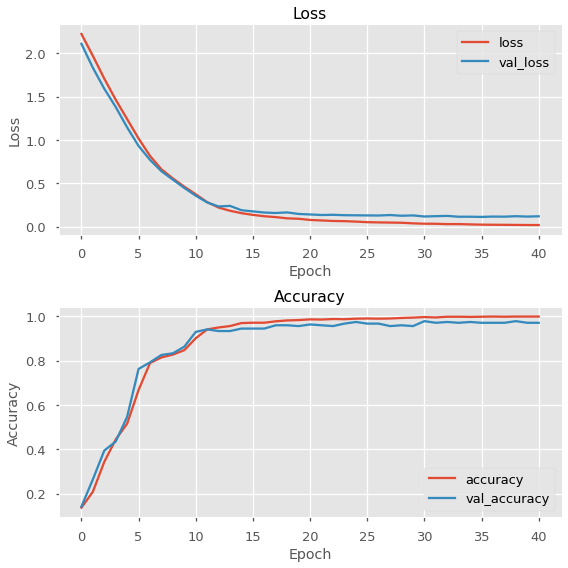

In [78]:
plot_history(history)

In [79]:
model.predict(X_test)[0]

array([5.4200023e-04, 1.3914067e-11, 7.0395301e-13, 6.2774495e-12,
       1.1087351e-05, 1.6257214e-10, 2.7580978e-13, 9.9944180e-01,
       3.2935543e-06, 1.8613658e-06], dtype=float32)

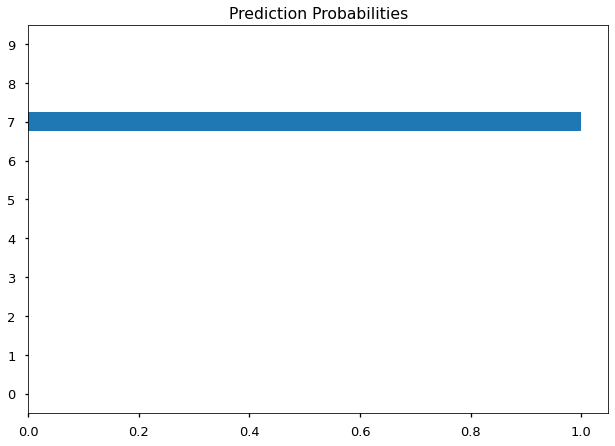

In [80]:
plot_prediction_probabilities(model, ohe, X_test[[0]])

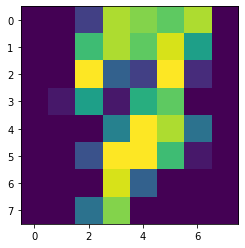

In [81]:
plt.imshow(X_test[0].reshape((8,8)))

In [82]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])